# data preprocessing (feature engineering +feature selection + sampling )

In [1]:
import pandas as pd 
import numpy as np


In [2]:
data=pd.read_csv(r"C:\Users\SAKET NANDAN\Documents\current_hackathon\backorder_prediction\Back order prediction\Training_Dataset_v2.csv")


C:\Users\SAKET NANDAN\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.isnull().sum()


sku                       0
national_inv              1
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg          1
perf_12_month_avg         1
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
went_on_backorder         1
dtype: int64

In [4]:
#we presenting all the columns given here 
data.columns

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [5]:
#what is the varaible types and non-null count for each variables we r presenting here 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

In [6]:
#since sku(product id) will not play an important role in model building so i m deleting sku here 
data.drop(labels='sku',axis=1,inplace=True)

##### generally any feature engineering we should perform we should fit on train data set then propagate to test dataset  , so i m here spliting dataset into train and test set 

### 1.splitting data set into train and test dataset  

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# Let's divide into train and test set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels='went_on_backorder', axis=1),  # predictors
    data['went_on_backorder'],  # target
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1181502, 21), (506359, 21))

In [9]:
# find categorical variables

categorical = [var for var in X_train.columns if X_train[var].dtype =='O']

print('There are {} categorical variables in training set.\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 6 categorical variables in training set.

The categorical variables are : ['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop']


In [10]:
# find numerical variables

numerical = [var for var in X_train.columns if X_train[var].dtype !='O']

print('There are {} numerical variables in training set.\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 15 numerical variables in training set.

The numerical variables are : ['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month', 'forecast_6_month', 'forecast_9_month', 'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank', 'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg', 'local_bo_qty']


In [11]:
numerical.pop(1) 

'lead_time'

### 1.missng imput

###### for numerical data before imputing blindely we should check whther data is normalised or not , if normal then we can perform mean imputation since in normal spread mean=median=mode, but if our data is skewed then we should impute by median becoz median lies in skewed area , so here in our data set only lead_time column have large no of missing values so  i m checking narmality of only lead_time , for rest of feature i will impute mean value 

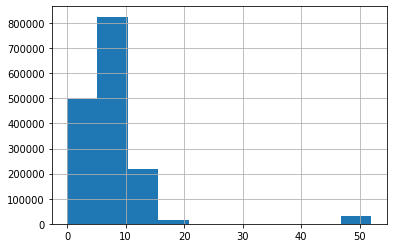

In [12]:
 data['lead_time'].hist()#since lead time is not normal then i will impute lead_time by median value

In [13]:
from sklearn.pipeline import Pipeline

# from feature-engine
from feature_engine import missing_data_imputers as mdi

In [14]:
pipe = Pipeline([
    ('median_imputer', mdi.MeanMedianImputer(imputation_method='median',
                                             variables = ['lead_time'])),
     
    ('mean_imputer', mdi.MeanMedianImputer(imputation_method='mean',
                                          variables = numerical)),
    ('cat_imputer',mdi.CategoricalVariableImputer(imputation_method='frequent',
                                    variables=categorical)),
     ])


In [15]:
pipe.fit(X_train)

Pipeline(memory=None,
         steps=[('median_imputer',
                 MeanMedianImputer(imputation_method='median',
                                   variables=['lead_time'])),
                ('mean_imputer',
                 MeanMedianImputer(imputation_method='mean',
                                   variables=['national_inv', 'in_transit_qty',
                                              'forecast_3_month',
                                              'forecast_6_month',
                                              'forecast_9_month',
                                              'sales_1_month', 'sales_3_month',
                                              'sales_6_month', 'sales_9_month',
                                              'min_bank', 'pieces_past_due',
                                              'perf_6_month_avg',
                                              'perf_12_month_avg',
                                              'local_bo_qty'])),
           

In [16]:
# let's transform the data with the pipeline
X_train_imp= pipe.transform(X_train)
X_test_imp= pipe.transform(X_test)



In [17]:
#X_train_imp.isnull().sum()
#X_test_imp.isnull().sum()

#### target varible imputation 

###### in order to perform imputation on dataset ,dataset must be in pandas dataframe ,but after splitting target_train and target_test is automtically converted into series , so first we convert in pandas dataframe then we impute missing value then again convert back into series  

In [18]:
type(y_test)

pandas.core.series.Series

In [19]:
y_train_pd=pd.DataFrame(y_train)
y_test_pd=pd.DataFrame(y_test)
type(y_train_pd)

pandas.core.frame.DataFrame

In [20]:
imputer = mdi.CategoricalVariableImputer(imputation_method='frequent',variables=['went_on_backorder'])


In [21]:
imputer.fit(y_train_pd)

CategoricalVariableImputer(imputation_method='frequent', return_object=False,
                           variables=['went_on_backorder'])

In [22]:
# let's transform the data with the pipeline
y_train_imp= imputer.transform(y_train_pd)
y_test_imp= imputer.transform(y_test_pd)


In [23]:
#some of the encoder can not able to create realtion ship with categorical type target , so here i m using custom fuction to make the 
#the target as integer 
#target is labeled as integer then no need to do this transformation 

def find_category_mappings(df, variable):
    return {k: i for i, k in enumerate(df[variable].unique(), 0)}

def integer_encode(data,  variable, ordinal_mapping):

    data[variable] = data[variable].map(ordinal_mapping)


In [24]:
for variable in ['went_on_backorder']:
    mappings = find_category_mappings(y_train_imp, variable)
    integer_encode(y_train_imp, variable, mappings)
    mappings = find_category_mappings(y_test_imp, variable)
    integer_encode(y_test_imp, variable, mappings)


In [25]:
#cleanup={"went_on_backorder":{"Yes":1,"No":0}}
#y_train_imp.replace(cleanup,inplace=True)
#y_test_imp.replace(cleanup,inplace=True)


In [26]:
#y_train_imp
#y_test_imp
#y_train_imp.isnull().sum()
#y_train_imp.isnull().sum()

In [27]:
#now again DataFrame is converted into series which will be used for various operation to find prediction and so many ...
y_train_no_miss= y_train_imp.squeeze()
y_test_no_miss= y_test_imp.squeeze()
type(y_test_no_miss)

pandas.core.series.Series

In [28]:
X_train_no_miss=X_train_imp.copy()
X_test_no_miss=X_test_imp.copy()

## categorical encoding 

###### since all the categorical column in this data set having two label (yes,no) then both one hot encoding and label encoding will work same . so here i m doing encoding by two technique integer label encoding and weight of evidence(woe) encoding because in woe encoding technique encoded value is assigned such way that encoded feature will create monotoic relationship with target variables  

###### in order to decide that which encoding technique is working good for our entire dataset , i will use encoded data set in random forest and logistic reggression and compare their roc_auc value 

### 1.ordered integer encoding


In [29]:
from feature_engine.categorical_encoders import OrdinalCategoricalEncoder

In [30]:
ordinal_enc = OrdinalCategoricalEncoder(
    # NOTE that we indicate ordered in the encoding_method, otherwise it assings numbers arbitrarily
    encoding_method='ordered',
    variables=categorical)

In [31]:
ordinal_enc.fit(X_train_no_miss,y_train_no_miss)

OrdinalCategoricalEncoder(encoding_method='ordered',
                          variables=['potential_issue', 'deck_risk',
                                     'oe_constraint', 'ppap_risk',
                                     'stop_auto_buy', 'rev_stop'])

In [32]:
X_train_ordered = ordinal_enc.transform(X_train_no_miss)
X_test_ordered = ordinal_enc.transform(X_test_no_miss)

In [33]:
#X_train_ordered
#X_test_ordered

##### weight of evidence encoding

In [34]:
from feature_engine.categorical_encoders import WoERatioCategoricalEncoder

In [35]:
woe_enc = WoERatioCategoricalEncoder(
    encoding_method = 'woe',
    variables=categorical)


In [36]:
# when fitting the transformer, we need to pass the target as well
# just like with any Scikit-learn predictor class

woe_enc.fit(X_train_no_miss, y_train_no_miss)

ValueError: p(0) or p(1) for a category in variable rev_stop is zero, log of zero is not defined

###### sinc,one of the category,s probabilty becomes 0 ,so woe will not work 

### Random Forest Performance


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [38]:
# create a function to build random forests and compare performance in train and test set


def run_randomForests(X_train, X_test, y_train, y_test):

    rf = RandomForestClassifier(n_estimators=50, random_state=39, max_depth=3)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print(
        'Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Test set')
    pred = rf.predict_proba(X_test)
    print(
        'Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

### logistic reggression

In [39]:
from sklearn.linear_model import LogisticRegression


In [40]:
def run_logistic(X_train, X_test, y_train, y_test):

    # function to train and test the performance of logistic regression
    logit = LogisticRegression(random_state=44, C=0.01)
    logit.fit(X_train, y_train)

    print('Train set')
    pred = logit.predict_proba(X_train)
    print(
        'Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Test set')
    pred = logit.predict_proba(X_test)
    print(
        'Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

In [41]:
# ordered labels
run_randomForests(X_train_ordered, X_test_ordered, y_train_no_miss, y_test_no_miss)

Train set
Random Forests roc-auc: 0.9044936998339721
Test set
Random Forests roc-auc: 0.9076614459542864


In [42]:
# ordered labels
run_logistic(X_train_ordered, X_test_ordered, y_train_no_miss, y_test_no_miss)

C:\Users\SAKET NANDAN\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train set
Logistic Regression roc-auc: 0.6482765047119715
Test set
Logistic Regression roc-auc: 0.648909434822432


In [46]:
#so,here we can conclude that ordinal label integer encoding is giving good result in comparision to logistic reggression classification  

# ------------------------gaussian transformtion-------------------------------------

###### since, random forest is giving very high performance in comparission to logistic reggression so i will go with tree based algorithm and in tree based algo there is no need of gaussian transformation of numerical variables . so , i m skipping this stage  

# -----------------------------------------descritisation--------------------------------------------

#### here i m performing two types descritisation one is supervised and other is unsupervised


#### in supervised i m taking equal width descritisation (useful tree based model genrally but we should analyse before blindely applying)


#### in unsupervised i m taking decision tree descritisation (useful for regression types generally but we should analyse before blindely applying )

## equal width decritisation

In [47]:
from feature_engine.discretisers import EqualWidthDiscretiser

In [48]:
#here i m performing discretisation for only numericals columns

disc = EqualWidthDiscretiser(bins=10, variables = numerical)

In [49]:
disc.fit(X_train_ordered)

EqualWidthDiscretiser(bins=10, return_object=False,
                      variables=['national_inv', 'in_transit_qty',
                                 'forecast_3_month', 'forecast_6_month',
                                 'forecast_9_month', 'sales_1_month',
                                 'sales_3_month', 'sales_6_month',
                                 'sales_9_month', 'min_bank', 'pieces_past_due',
                                 'perf_6_month_avg', 'perf_12_month_avg',
                                 'local_bo_qty'])

In [50]:
# transform train and text

X_train_ordered_des = disc.transform(X_train_ordered)
X_test_ordered_des = disc.transform(X_test_ordered)

In [51]:
import matplotlib.pyplot as plt

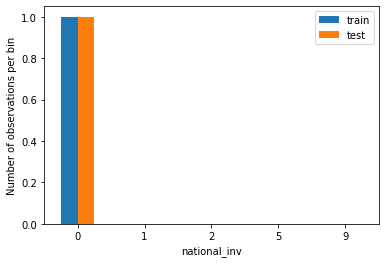

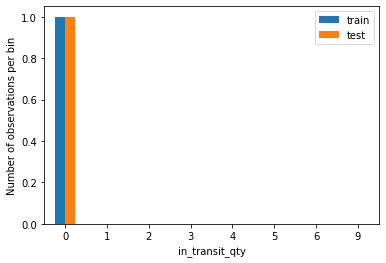

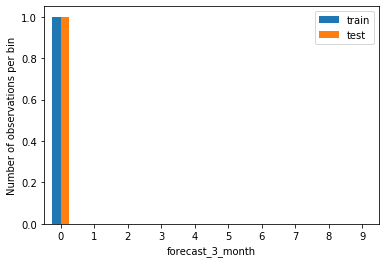

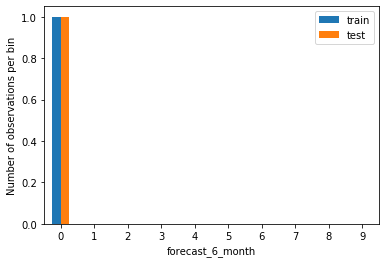

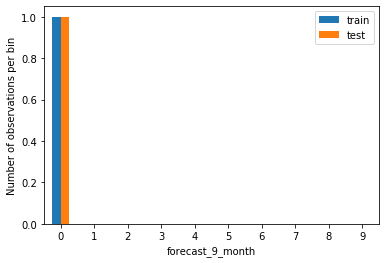

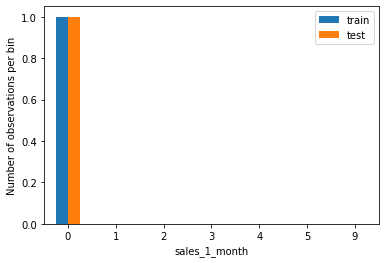

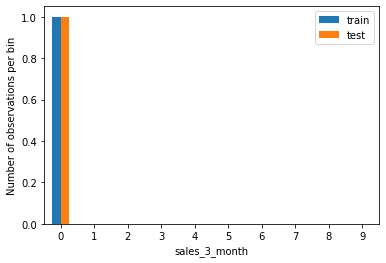

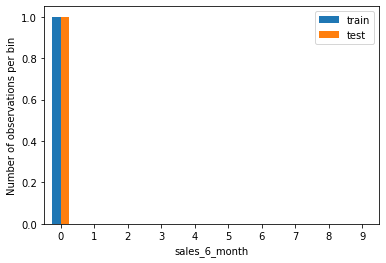

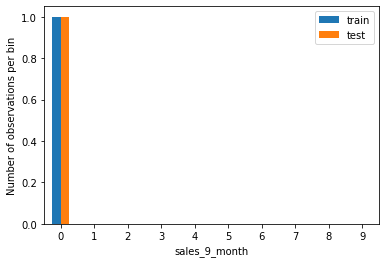

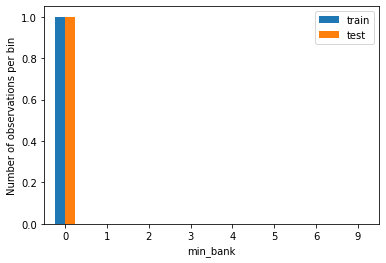

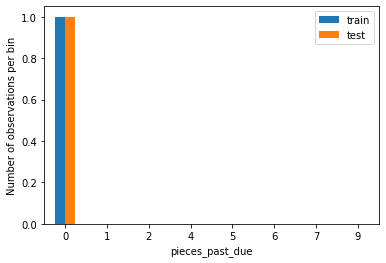

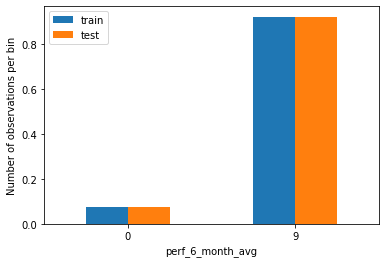

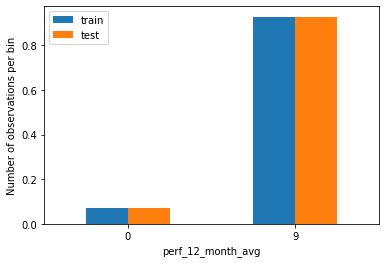

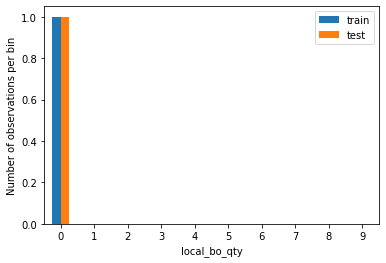

In [52]:
for i in numerical:
    t1 = X_train_ordered_des.groupby([i])[i].count() / len(X_train_ordered_des)
    t2 = X_test_ordered_des.groupby([i])[i].count() / len(X_test_ordered_des)

    tmp = pd.concat([t1, t2], axis=1)
    tmp.columns = ['train', 'test']
    tmp.plot.bar()
    plt.xticks(rotation=0)
    plt.ylabel('Number of observations per bin')

## descretisation with decision tree

In [53]:
from feature_engine.discretisers import DecisionTreeDiscretiser

In [54]:
#set up the decision tree discretiser indicating:
# cross-validation number (cv)
# how to evaluate model performance (scoring)
# the variables we want to discretise (variables)
# whether it is a target for regression or classification
# and the grid with the parameters we want to test

treeDisc = DecisionTreeDiscretiser(cv=3, scoring='accuracy',
                                   variables=numerical,
                                   regression=False,
                                   param_grid={'max_depth': [ 2, 3],
                                              'min_samples_leaf':[10,4]})

treeDisc.fit(X_train_ordered, y_train_no_miss)

DecisionTreeDiscretiser(cv=3,
                        param_grid={'max_depth': [2, 3],
                                    'min_samples_leaf': [10, 4]},
                        random_state=None, regression=False, scoring='accuracy',
                        variables=['national_inv', 'in_transit_qty',
                                   'forecast_3_month', 'forecast_6_month',
                                   'forecast_9_month', 'sales_1_month',
                                   'sales_3_month', 'sales_6_month',
                                   'sales_9_month', 'min_bank',
                                   'pieces_past_due', 'perf_6_month_avg',
                                   'perf_12_month_avg', 'local_bo_qty'])

In [55]:
# let's transform the data

X_train_ordered_des_t = treeDisc.transform(X_train_ordered)
X_test_ordered_des_t = treeDisc.transform(X_test_ordered)


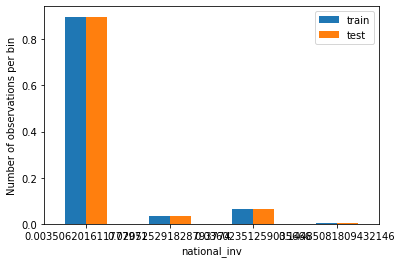

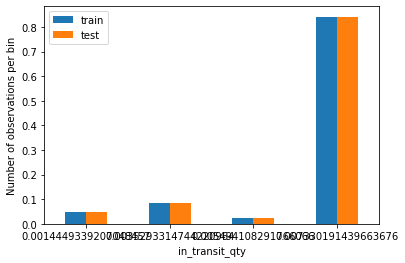

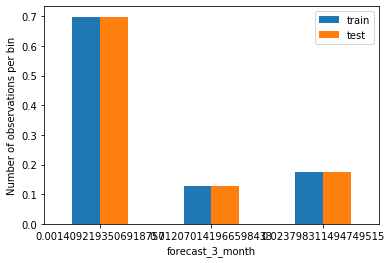

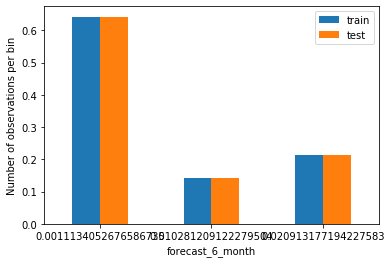

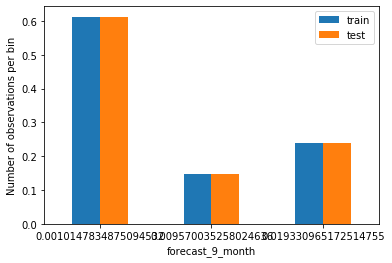

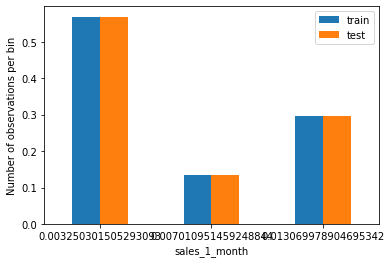

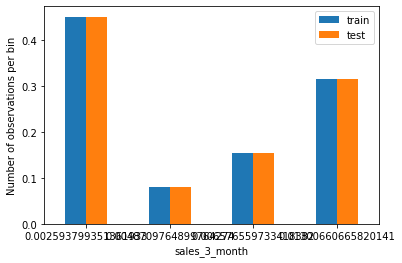

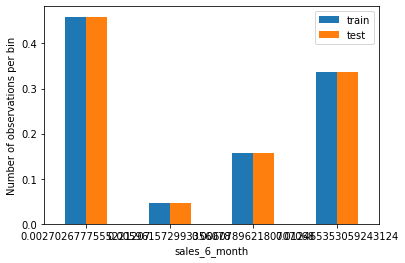

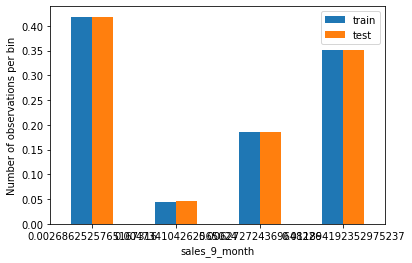

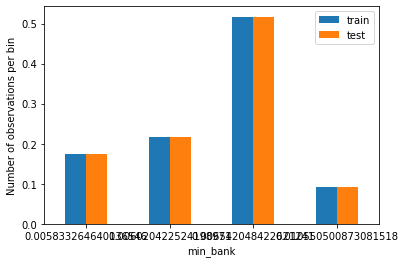

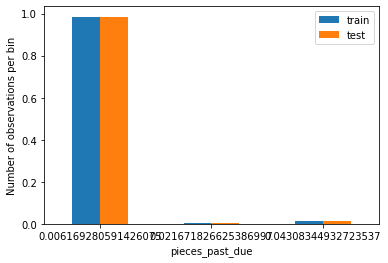

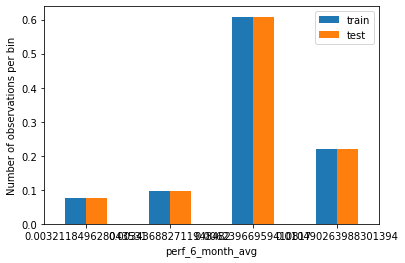

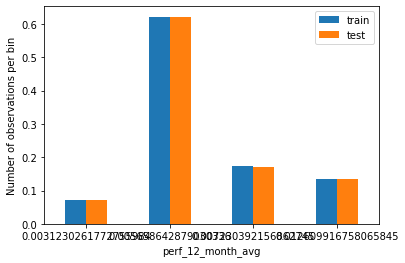

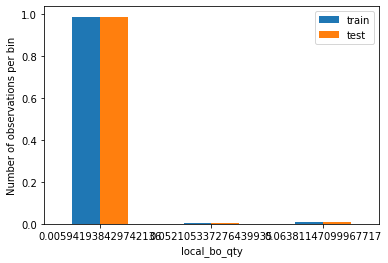

In [56]:
for i in numerical:
    t1 = X_train_ordered_des_t.groupby([i])[i].count() / len(X_train_ordered_des_t)
    t2 = X_test_ordered_des_t.groupby([i])[i].count() / len(X_test_ordered_des_t)

    tmp = pd.concat([t1, t2], axis=1)
    tmp.columns = ['train', 'test']
    tmp.plot.bar()
    plt.xticks(rotation=0)
    plt.ylabel('Number of observations per bin')

### now checking performence for equal width descritisation and descision tree descritisation by both random forest

In [57]:
#random forest with euql descritisation 
run_randomForests(X_train_ordered_des,X_test_ordered_des, y_train_no_miss, y_test_no_miss)

Train set
Random Forests roc-auc: 0.6002781698142861
Test set
Random Forests roc-auc: 0.5986667033653679


In [58]:
#logistic reggression  with euql descritisation 
run_logistic(X_train_ordered_des,X_test_ordered_des, y_train_no_miss, y_test_no_miss)

C:\Users\SAKET NANDAN\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train set
Logistic Regression roc-auc: 0.5979105647860783
Test set
Logistic Regression roc-auc: 0.5963314000072542


In [59]:
#random forest with descision tree descritisation 
run_randomForests(X_train_ordered_des_t,X_test_ordered_des_t, y_train_no_miss, y_test_no_miss)

Train set
Random Forests roc-auc: 0.8973472218026594
Test set
Random Forests roc-auc: 0.9003786916480088


In [101]:
#logistic reggression with descision tree descritisation 
run_logistic(X_train_ordered_des_t,X_test_ordered_des_t, y_train_no_miss, y_test_no_miss)

Train set
Logistic Regression roc-auc: 0.6911717739558314
Test set
Logistic Regression roc-auc: 0.6952363976863982


### so, we can conclude that our performence has dropped after descritisation and also equal bin descritisation is not suitable for tree based algorithm 

# -----------------------------------------------scaling---------------------------------------------------


In [60]:
# the scaler - for standardisation
from sklearn.preprocessing import StandardScaler

In [61]:
#standardisation: with the StandardScaler from sklearn

# set up the scaler
scaler = StandardScaler()
# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train_ordered_des_t)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [62]:
X_train_ordered_t_scaled = scaler.transform(X_train_ordered_des_t)
X_test_ordered_t_scaled = scaler.transform(X_test_ordered_des_t)

#### here i m performing standarization on decsion tree descritized data and checking impact on logistic and random forest algo

In [63]:
#random forest with decision tree descritisation in succession scaling
run_randomForests(X_train_ordered_t_scaled,X_test_ordered_t_scaled, y_train_no_miss, y_test_no_miss)

Train set
Random Forests roc-auc: 0.8973472218026594
Test set
Random Forests roc-auc: 0.9003786916480088


In [64]:
#logistic reggression  with decision tree descritisation in succession scaling
run_logistic(X_train_ordered_t_scaled,X_test_ordered_t_scaled, y_train_no_miss, y_test_no_miss)

Train set
Logistic Regression roc-auc: 0.883884016992297
Test set
Logistic Regression roc-auc: 0.8873531331424318


###### so , from here we can conclude that scaling is not playaing an impotant role in tree based algorithm where as scaling playing great impact on logistic reggression algrithm its roc_auc hiked from 0.69 to 0.88 (its win-win :-))

# ------------------------------------ Feature Selection------------------------------------------------- 

In [107]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel

In [108]:
X_train=X_train_ordered_des_t.copy()
X_test=X_test_ordered_des_t.copy()
y_train=y_train_no_miss.copy()
y_test=y_test_no_miss.copy()

In [109]:
# I keep a copy of the dataset with all the variables
# to measure the performance of machine learning models
# at the end of the notebook
X_train_original = X_train.copy()
X_test_original = X_test.copy()

## Remove constant features

In [110]:
#before removing constatnt features
X_train.shape,X_test.shape

((1181502, 21), (506359, 21))

In [111]:
# remove constant features
constant_features = [
    feat for feat in X_train.columns if X_train[feat].std() == 0
]
 
X_train.drop(labels=constant_features, axis=1, inplace=True)
X_test.drop(labels=constant_features, axis=1, inplace=True)
 
X_train.shape, X_test.shape

((1181502, 21), (506359, 21))

## Remove quasi-constant features

###### i made it as comment , because when i applied quasi-cnstant feature selection then it removed total 17 features and returned only 4 features which i implemented for random forest's feature selection method then we remained with only one features which were giving very less roc_auc value  0.60 for both train and test , so i made it comment (removed this step from feature selection)

In [112]:
# remove quasi-constant features
#sel = VarianceThreshold(
#    threshold=0.01)  # 0.1 indicates 99% of observations approximately
 
#sel.fit(X_train)  # fit finds the features with low variance
 
#sum(sel.get_support()) # how many not quasi-constant?

In [113]:
#features_to_keep = X_train.columns[sel.get_support()]

In [114]:
# we can then remove the features like this
#X_train = sel.transform(X_train)
#X_test = sel.transform(X_test)
 
#X_train.shape, X_test.shape

In [115]:
# sklearn transformations lead to numpy arrays
# here I transform the arrays back to dataframes
# please be mindful of getting the columns assigned
# correctly
 
#X_train= pd.DataFrame(X_train)
#X_train.columns = features_to_keep
 
#X_test= pd.DataFrame(X_test)
#X_test.columns = features_to_keep

## Remove duplicated features


In [116]:
# check for duplicated features in the training set
duplicated_feat = []
for i in range(0, len(X_train.columns)):
    if i % 10 == 0:  # this helps me understand how the loop is going
        print(i)
 
    col_1 = X_train.columns[i]
 
    for col_2 in X_train.columns[i + 1:]:
        if X_train[col_1].equals(X_train[col_2]):
            duplicated_feat.append(col_2)
            
len(duplicated_feat)#no of duplicate features?

0
10
20


0

In [118]:
# remove duplicated features
X_train.drop(labels=duplicated_feat, axis=1, inplace=True)
X_test.drop(labels=duplicated_feat, axis=1, inplace=True)
 
X_train.shape, X_test.shape


((1181502, 21), (506359, 21))

In [119]:
# I keep a copy of the dataset except constant and duplicated variables
# to measure the performance of machine learning models
# at the end of the notebook
 
X_train_basic_filter = X_train.copy()
X_test_basic_filter = X_test.copy()

## Remove correlated features

In [121]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
 
corr_features = correlation(X_train, 0.85)
print('correlated features: ', len(set(corr_features)) )

correlated features:  3


In [122]:
# removed correlated  features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)
 
X_train.shape, X_test.shape

((1181502, 18), (506359, 18))

In [123]:
# keep a copy of the dataset at  this stage
X_train_corr = X_train.copy()
X_test_corr = X_test.copy()

## Remove features using univariate ROC-AUC

In [124]:
# find important features using univariate roc-auc
 
# loop to build a tree, make predictions and get the roc-auc
# for each feature of the train set
 
roc_values = []
for feature in X_train.columns:
    clf = DecisionTreeClassifier()
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)
    y_scored = clf.predict_proba(X_test[feature].fillna(0).to_frame())
    roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))

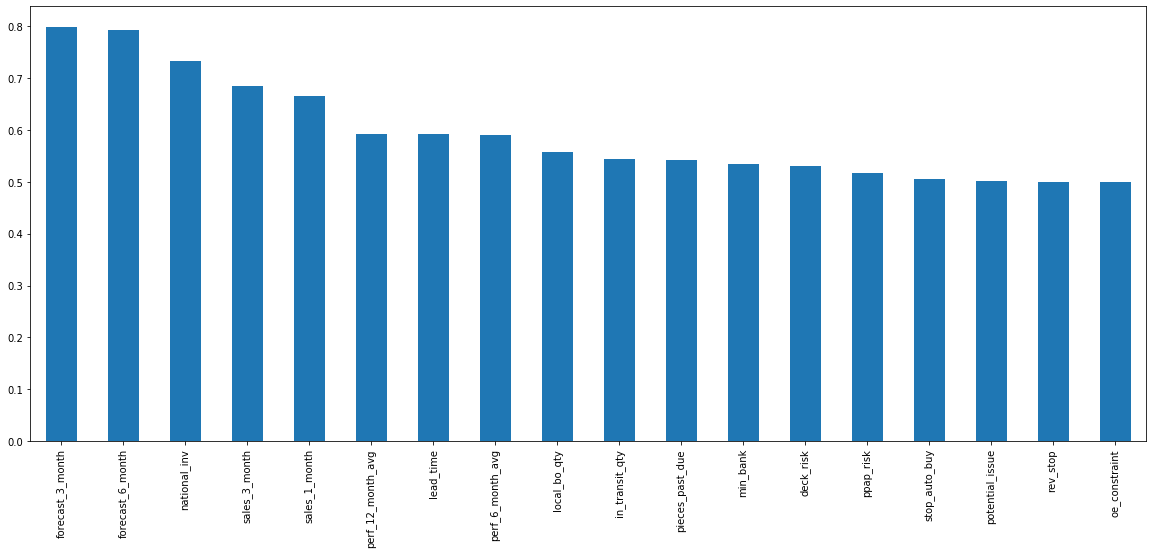

In [125]:
# let's add the variable names and order it for clearer visualisation
roc_values = pd.Series(roc_values)
roc_values.index = X_train.columns
roc_values.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [126]:
# by removing features with univariate roc_auc == 0.5
# we remove another 30 features
 
selected_feat = roc_values[roc_values>0.5]
len(selected_feat), X_train.shape[1]

(18, 18)

## Select features by random forests derived importance

In [128]:
# select features using the impotance derived from
# random forests
 
sel_ = SelectFromModel(RandomForestClassifier(n_estimators=200))
sel_.fit(X_train, y_train)
 
# remove features with zero coefficient from dataset
# and parse again as dataframe (output of sklearn is
# numpy array)
X_train_rf = pd.DataFrame(sel_.transform(X_train))
X_test_rf = pd.DataFrame(sel_.transform(X_test))
 
# add the columns name
X_train_rf.columns = X_train.columns[(sel_.get_support())]
X_test_rf.columns = X_train.columns[(sel_.get_support())]

In [129]:
X_train_rf.shape, X_test_rf.shape

((1181502, 8), (506359, 8))

In [142]:
X_train_rf.columns

Index(['national_inv', 'lead_time', 'in_transit_qty', 'sales_1_month',
       'sales_3_month', 'min_bank', 'perf_6_month_avg', 'perf_12_month_avg'],
      dtype='object')

## Compare the performance in machine learning algorithms

In [130]:
# create a function to build random forests and compare performance in train and test set
 
def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)
    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [131]:
# original
run_randomForests(X_train_original,
                  X_test_original,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.9033062525327127
Test set
Random Forests roc-auc: 0.9068775533634512


In [132]:
# filter methods - basic
run_randomForests(X_train_basic_filter,
                  X_test_basic_filter,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.9033062525327127
Test set
Random Forests roc-auc: 0.9068775533634512


In [133]:
# filter methods - correlation
run_randomForests(X_train_corr,
                  X_test_corr,
                  y_train, y_test)


Train set
Random Forests roc-auc: 0.9017366352573324
Test set
Random Forests roc-auc: 0.905999410650637


In [135]:
# embedded methods - Random forests
run_randomForests(X_train_rf,
                  X_test_rf,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.8682223199617812
Test set
Random Forests roc-auc: 0.8776974817577521


In [134]:
# filter methods - univariate roc-auc
run_randomForests(X_train[selected_feat.index],
                  X_test_corr[selected_feat.index],
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.9017366352573324
Test set
Random Forests roc-auc: 0.905999410650637


## now we will check the impact on logistic reggression 

In [136]:
# create a function to build logistic regression and compare performance in train and test set
 
def run_logistic(X_train, X_test, y_train, y_test):
    # function to train and test the performance of logistic regression
    logit = LogisticRegression(random_state=44)
    logit.fit(X_train, y_train)
    print('Train set')
    pred = logit.predict_proba(X_train)
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    print('Test set')
    pred = logit.predict_proba(X_test)
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [137]:
# original
scaler = StandardScaler().fit(X_train_original)
 
run_logistic(scaler.transform(X_train_original),
             scaler.transform(X_test_original),
                  y_train, y_test)

Train set
Logistic Regression roc-auc: 0.8836168201558754
Test set
Logistic Regression roc-auc: 0.8871340001352881


In [138]:
# filter methods - basic
scaler = StandardScaler().fit(X_train_basic_filter)
 
run_logistic(scaler.transform(X_train_basic_filter),
             scaler.transform(X_test_basic_filter),
                  y_train, y_test)

Train set
Logistic Regression roc-auc: 0.8836168201558754
Test set
Logistic Regression roc-auc: 0.8871340001352881


In [139]:
# filter methods - correlation
scaler = StandardScaler().fit(X_train_corr)
 
run_logistic(scaler.transform(X_train_corr),
             scaler.transform(X_test_corr),
                  y_train, y_test)

Train set
Logistic Regression roc-auc: 0.8821378701078929
Test set
Logistic Regression roc-auc: 0.8865325951508329


In [140]:
# filter methods - univariate roc-auc
scaler = StandardScaler().fit(X_train[selected_feat.index])
 
run_logistic(scaler.transform(X_train[selected_feat.index]),
             scaler.transform(X_test_corr[selected_feat.index]),
                  y_train, y_test)

Train set
Logistic Regression roc-auc: 0.8821378701078929
Test set
Logistic Regression roc-auc: 0.8865325951508329


In [141]:
# embedded methods - Random Forests importance
 
scaler = StandardScaler().fit(X_train_rf)
 
run_logistic(
    scaler.transform(X_train_rf), scaler.transform(X_test_rf), y_train, y_test)

Train set
Logistic Regression roc-auc: 0.8295560474552242
Test set
Logistic Regression roc-auc: 0.8395671252493228


## now we will try to select features based on lasso regularization and will see the impact on random forest and logistic reggression 

In [144]:
X_train=X_train_ordered_des_t.copy()
X_test=X_test_ordered_des_t.copy()
y_train=y_train_no_miss.copy()
y_test=y_test_no_miss.copy()

In [145]:
# I keep a copy of the dataset with all the variables
# to measure the performance of machine learning models
# at the end of the notebook
X_train_original = X_train.copy()
X_test_original = X_test.copy()

In [146]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
 
corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  4


In [147]:
# removed correlated  features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)
 
X_train.shape, X_test.shape

((1181502, 17), (506359, 17))

In [148]:
# keep a copy of the dataset at  this stage
X_train_corr = X_train.copy()
X_test_corr = X_test.copy()

In [150]:
# find important features using univariate roc-auc
 
# loop to build a tree, make predictions and get the roc-auc
# for each feature of the train set
 
roc_values = []
for feature in X_train.columns:
    clf = DecisionTreeClassifier()
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)
    y_scored = clf.predict_proba(X_test[feature].fillna(0).to_frame())
    roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))

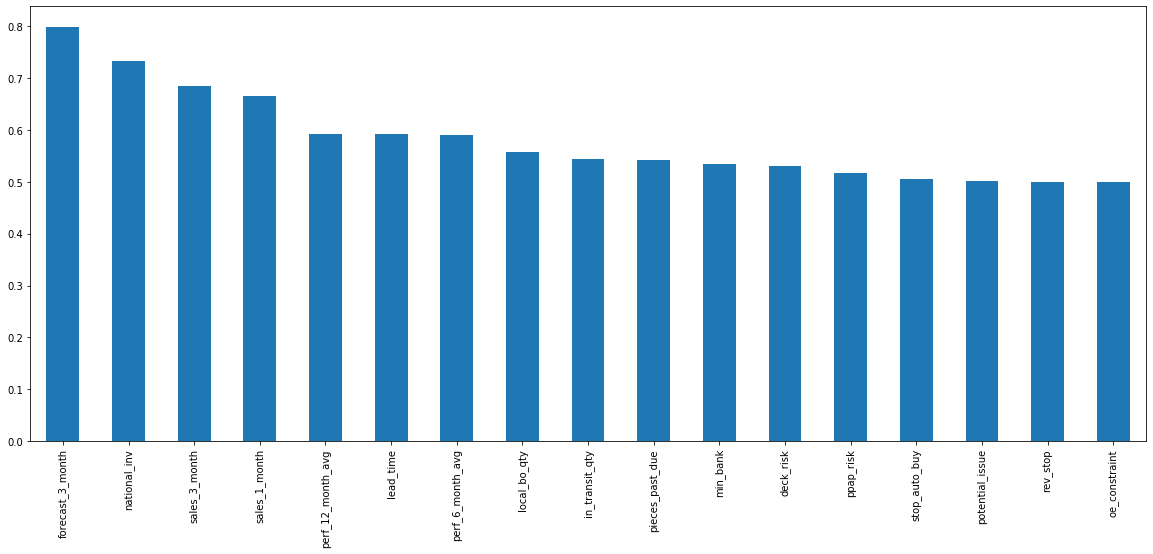

In [151]:
# let's add the variable names and order it for clearer visualisation
roc_values = pd.Series(roc_values)
roc_values.index = X_train.columns
roc_values.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [152]:
# by removing features with univariate roc_auc == 0.5
# we remove another 30 features
 
selected_feat = roc_values[roc_values>0.5]
len(selected_feat), X_train.shape[1]

(17, 17)

## Remove features using Lasso

In [153]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [155]:
# fit a lasso and select features, make sure to select l1
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l2'))
sel_.fit(scaler.transform(X_train), y_train)
 
# remove features with zero coefficient from dataset
# and parse again as dataframe (output of sklearn is
# numpy array)
X_train_lasso = pd.DataFrame(sel_.transform(X_train))
X_test_lasso = pd.DataFrame(sel_.transform(X_test))
 
# add the columns name
X_train_lasso.columns = X_train.columns[(sel_.get_support())]
X_test_lasso.columns = X_train.columns[(sel_.get_support())]

In [156]:
X_train_lasso.shape, X_test_lasso.shape

((1181502, 6), (506359, 6))

#### test of feature selection using lasso regularization on random forest 

In [157]:
# filter methods - correlation
run_randomForests(X_train_corr,
                  X_test_corr,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.899827690923332
Test set
Random Forests roc-auc: 0.9052663882534376


In [158]:
# filter methods - univariate roc-auc
run_randomForests(X_train[selected_feat.index],
                  X_test_corr[selected_feat.index],
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.899827690923332
Test set
Random Forests roc-auc: 0.9052663882534376


In [159]:
# embedded methods - Lasso
run_randomForests(X_train_lasso,
                  X_test_lasso,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.8923109104369339
Test set
Random Forests roc-auc: 0.898813263550991


#### test of feature selection using lasso regularization on logistic reggression 

In [160]:
# filter methods - correlation
scaler = StandardScaler().fit(X_train_corr)
 
run_logistic(scaler.transform(X_train_corr),
             scaler.transform(X_test_corr),
                  y_train, y_test)

Train set
Logistic Regression roc-auc: 0.878528188650098
Test set
Logistic Regression roc-auc: 0.8841269877600091


In [161]:
# filter methods - univariate roc-auc
scaler = StandardScaler().fit(X_train[selected_feat.index])
 
run_logistic(scaler.transform(X_train[selected_feat.index]),
             scaler.transform(X_test_corr[selected_feat.index]),
                  y_train, y_test)

Train set
Logistic Regression roc-auc: 0.878528188650098
Test set
Logistic Regression roc-auc: 0.8841269877600091


In [162]:
# embedded methods - Lasso
run_randomForests(X_train_lasso,
                  X_test_lasso,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.8923109104369339
Test set
Random Forests roc-auc: 0.898813263550991


In [163]:
X_train_lasso.columns

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'sales_1_month', 'sales_3_month'],
      dtype='object')